In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("student_habits_performance.csv")
df.head()


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [13]:
df['Total_Skor'] = df[['study_hours_per_day', 'attendance_percentage',
                       'sleep_hours', 'exercise_frequency',
                       'mental_health_rating', 'exam_score']].sum(axis=1)


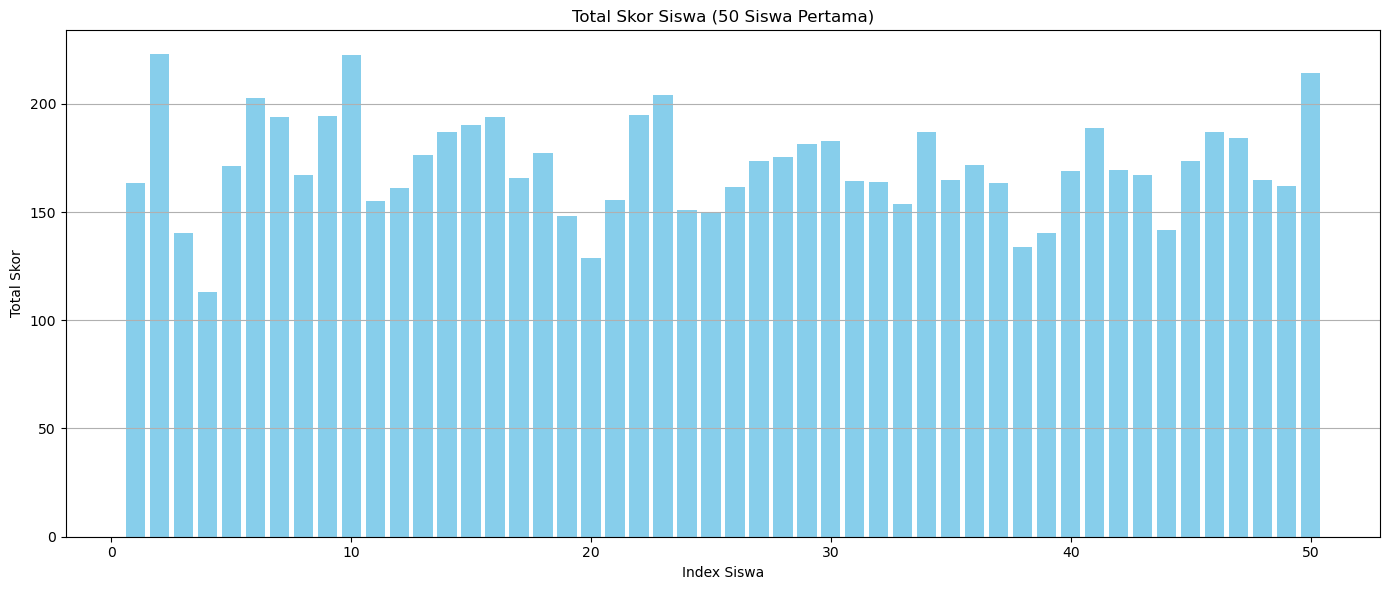

In [4]:
plt.figure(figsize=(14,6))
plt.bar(np.arange(1, 51), df['Total_Skor'][:50], color='skyblue')
plt.title("Total Skor Siswa (50 Siswa Pertama)")
plt.xlabel("Index Siswa")
plt.ylabel("Total Skor")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


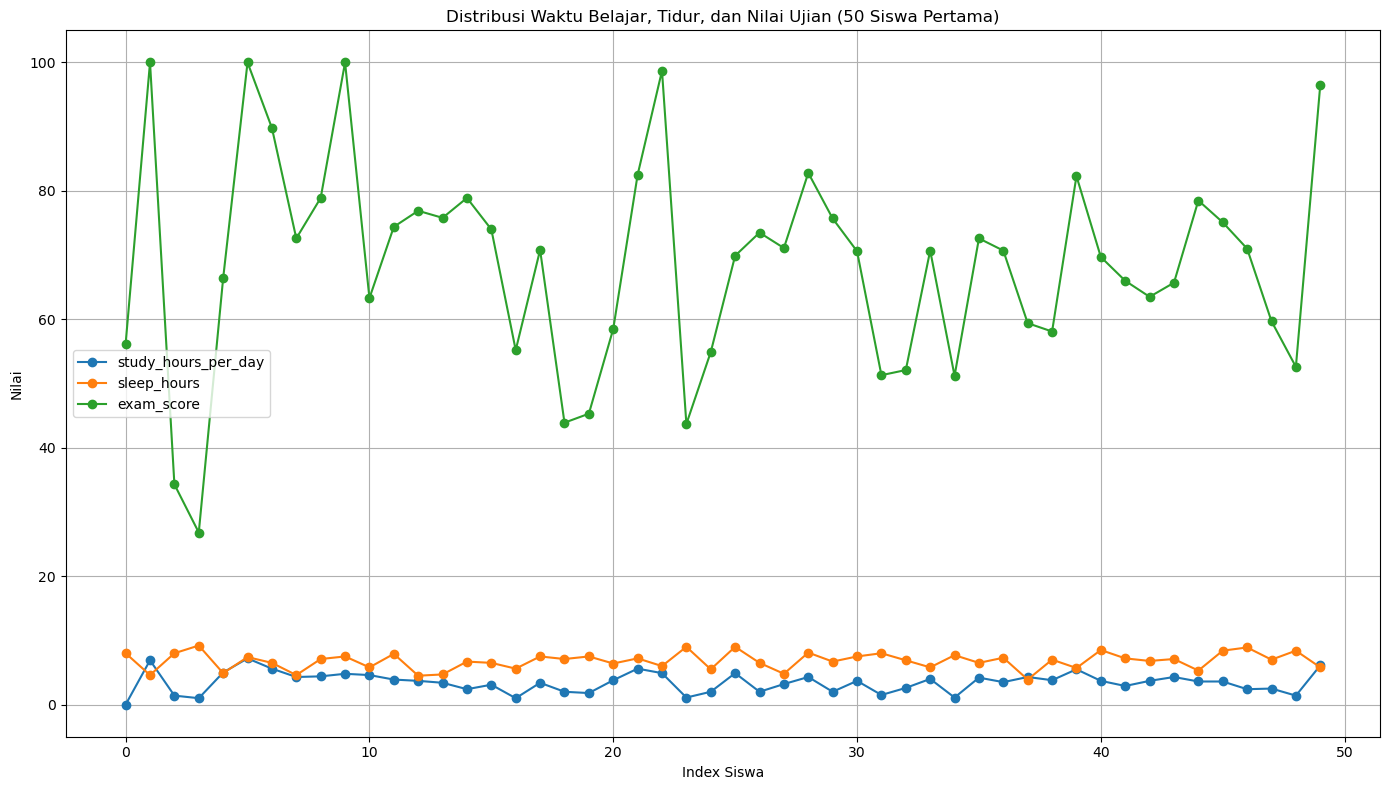

In [5]:
plt.figure(figsize=(14,8))
for fitur in ['study_hours_per_day', 'sleep_hours', 'exam_score']:
    plt.plot(df.index[:50], df[fitur][:50], marker='o', label=fitur)
plt.title("Distribusi Waktu Belajar, Tidur, dan Nilai Ujian (50 Siswa Pertama)")
plt.xlabel("Index Siswa")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


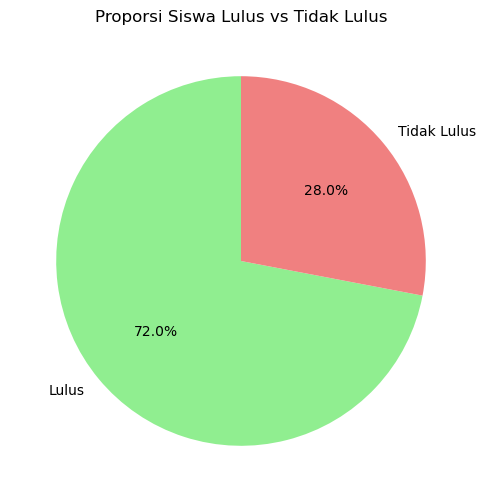

In [6]:
df['Lulus'] = df['exam_score'] >= 60
plt.figure(figsize=(6,6))
df['Lulus'].value_counts().plot.pie(
    labels=['Lulus' if val else 'Tidak Lulus' for val in df['Lulus'].value_counts().index],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral']
)
plt.title("Proporsi Siswa Lulus vs Tidak Lulus")
plt.ylabel("")
plt.show()


In [11]:
df['Index_Siswa'] = np.arange(1, len(df)+1)
X = df[['Index_Siswa']]
y = df['Total_Skor']

model = LinearRegression()
model.fit(X, y)

idx_terakhir = df['Index_Siswa'].iloc[-1]
prediksi = model.predict([[idx_terakhir]])[0]
print(f"Prediksi Total Skor Siswa ke-{idx_terakhir}: {prediksi:,.2f}")


Prediksi Total Skor Siswa ke-1000: 170.38


D:\ANACONDA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


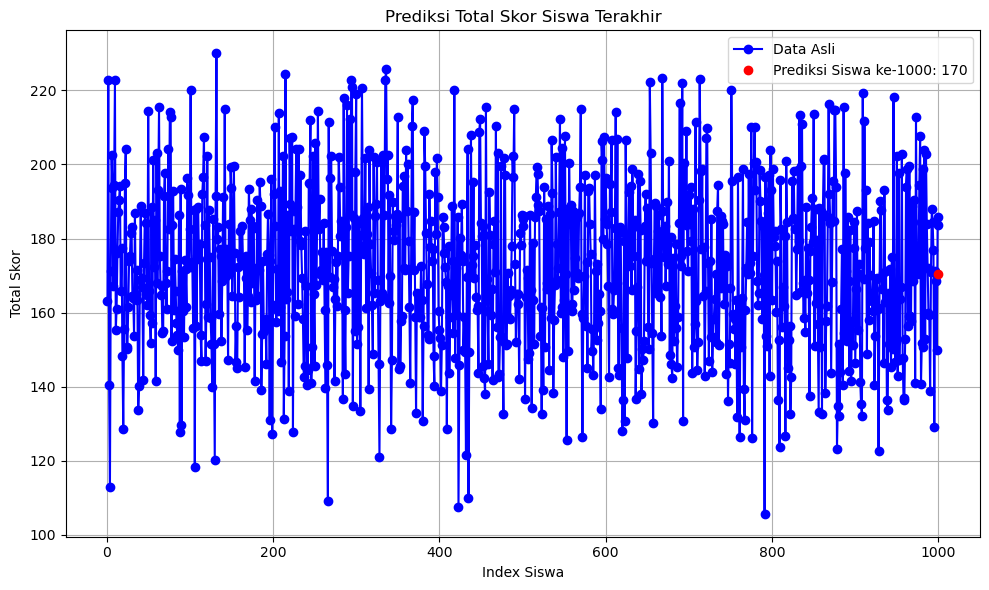

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df['Index_Siswa'], y, 'bo-', label='Data Asli')
plt.plot(idx_terakhir, prediksi, 'ro', label=f'Prediksi Siswa ke-{idx_terakhir}: {prediksi:,.0f}')
plt.xlabel("Index Siswa")
plt.ylabel("Total Skor")
plt.title("Prediksi Total Skor Siswa Terakhir")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
